In [3]:
# 1. Initialisation
#    Weights of neurons in the map layer are initialised.

# 2. Competitive process
#    Select one input sample and search the best matching unit among all neurons in n x m grid using distance measures.

# 3. Cooperative process
#    Find the proximity neurons of BMU by neighbourhood function.

# 4. Adaptation process
#    Update the BMU and neighbours' weights by shifting the values towards the input pattern.
#    If the maximum count of training iteration is reached, exit. If not, increment the iteration count by 1 and repeat the process from 2.


In [5]:
import numpy as np
from numpy.ma.core import ceil
from scipy.spatial import distance #distance calculation
from sklearn.preprocessing import MinMaxScaler #normalisation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

In [6]:
data_file = "data_banknote_authentication.txt"
data_x = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=range(0,4) ,dtype=np.float64)
data_y = np.loadtxt(data_file, delimiter=",", skiprows=0, usecols=(4,),dtype=np.int64)

In [7]:
# train and test split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape) # check the shapes

(1097, 4) (1097,) (275, 4) (275,)


In [8]:
# Helper functions

# Data Normalisation
def minmax_scaler(data):
  scaler = MinMaxScaler()
  scaled = scaler.fit_transform(data)
  return scaled

# Euclidean distance
def e_distance(x,y):
  return distance.euclidean(x,y)

# Manhattan distance
def m_distance(x,y):
  return distance.cityblock(x,y)

# Best Matching Unit search
def winning_neuron(data, t, som, num_rows, num_cols):
  winner = [0,0]
  shortest_distance = np.sqrt(data.shape[1]) # initialise with max distance
  input_data = data[t]
  for row in range(num_rows):
    for col in range(num_cols):
      distance = e_distance(som[row][col], data[t])
      if distance < shortest_distance: 
        shortest_distance = distance
        winner = [row,col]
  return winner

# Learning rate and neighbourhood range calculation
def decay(step, max_steps,max_learning_rate,max_m_dsitance):
  coefficient = 1.0 - (np.float64(step)/max_steps)
  learning_rate = coefficient*max_learning_rate
  neighbourhood_range = ceil(coefficient * max_m_dsitance)
  return learning_rate, neighbourhood_range

In [9]:
# hyperparameters
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5*10e3)

# num_nurons = 5*np.sqrt(train_x.shape[0])
# grid_size = ceil(np.sqrt(num_nurons))
# print(grid_size)

In [10]:

train_x_norm = minmax_scaler(train_x) # normalisation

# initialising self-organising map
num_dims = train_x_norm.shape[1] # numnber of dimensions in the input data
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims)) # map construction

# start training iterations
for step in range(max_steps):
  if (step+1) % 1000 == 0:
    print("Iteration: ", step+1) # print out the current iteration for every 1k
  learning_rate, neighbourhood_range = decay(step, max_steps,max_learning_rate,max_m_dsitance)

  t = np.random.randint(0,high=train_x_norm.shape[0]) # random index of traing data
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  for row in range(num_rows):
    for col in range(num_cols):
      if m_distance([row,col],winner) <= neighbourhood_range:
        som[row][col] += learning_rate*(train_x_norm[t]-som[row][col]) #update neighbour's weight

print("SOM training completed")

Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

In [12]:
# collecting labels

label_data = train_y
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
  for col in range(num_cols):
    map[row][col] = [] # empty list to store the label

for t in range(train_x_norm.shape[0]):
  if (t+1) % 1000 == 0:
    print("sample data: ", t+1)
  winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
  map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron

sample data:  1000


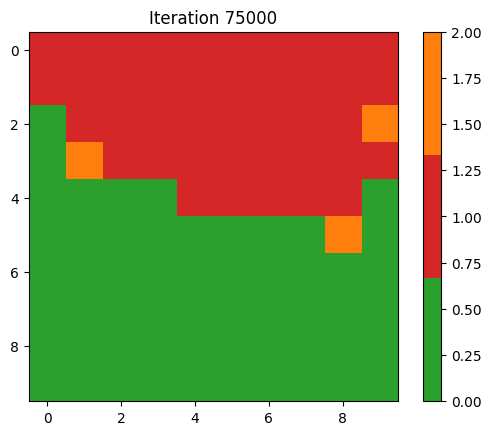

In [13]:

# construct label map
label_map = np.zeros(shape=(num_rows, num_cols),dtype=np.int64)
for row in range(num_rows):
  for col in range(num_cols):
    label_list = map[row][col]
    if len(label_list)==0:
      label = 2
    else:
      label = max(label_list, key=label_list.count)
    label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


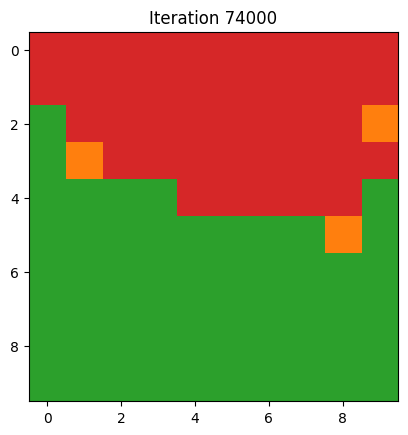

In [15]:
fig = plt.figure()
ims = []
for i in range(0, max_steps, 1000):
    title = ('Iteration ' + str(i))
    cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
    im = plt.imshow(label_map, cmap=cmap, animated=True)
    plt.title(title)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True, repeat_delay=1000)
ani.save('SOM.gif', writer='imagemagick')

plt.show()


In [14]:
data = minmax_scaler(test_x) # normalisation

winner_labels = []

for t in range(data.shape[0]):
 winner = winning_neuron(data, t, som, num_rows, num_cols)
 row = winner[0]
 col = winner[1]
 predicted = label_map[row][col]
 winner_labels.append(predicted)

print("Accuracy: ",accuracy_score(test_y, np.array(winner_labels)))

Accuracy:  1.0


In [1]:
#  Canonical correlation analysis (CCA)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler

In [3]:
X,_ = load_iris(return_X_y=True, as_frame=True)


<Axes: >

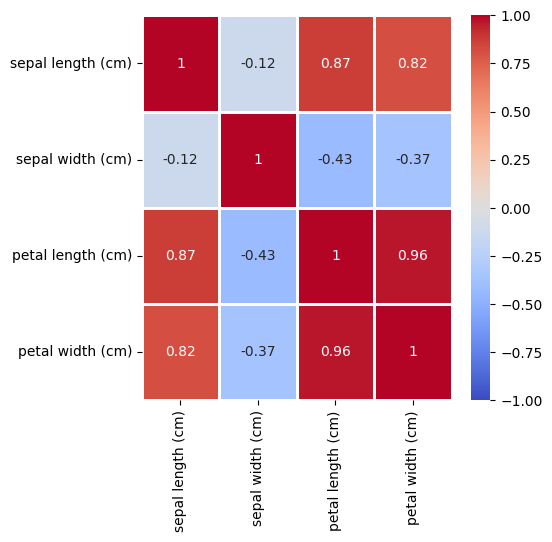

In [4]:
corr_coeff = X.corr()
plt.figure(figsize = (5, 5))
sns.heatmap(corr_coeff, cmap='coolwarm', annot=True, linewidths=1, vmin=-1)

In [5]:
X1 = X.iloc[:, :2] # extract first two columns to create a sepal-related features dataset
X2 = X.iloc[:, 2:] # extract last two columns to create a petal-related features dataset
scaler = StandardScaler() 
X1_sc = scaler.fit_transform(X1) #scale data
X2_sc = scaler.fit_transform(X2) 
n_comp=2 #choose number of canonical variates pairs 
cca = CCA(scale=False, n_components=n_comp) #define CCA
cca.fit(X1_sc, X2_sc) #fit our scaled data
X1_c, X2_c = cca.transform(X1_sc, X2_sc) #transform our datasests to obtain canonical variates

What we did here is that we split our dataset into X1: sepal-related features and X2: petal-related features. Then, we scaled them

<BarContainer object of 2 artists>

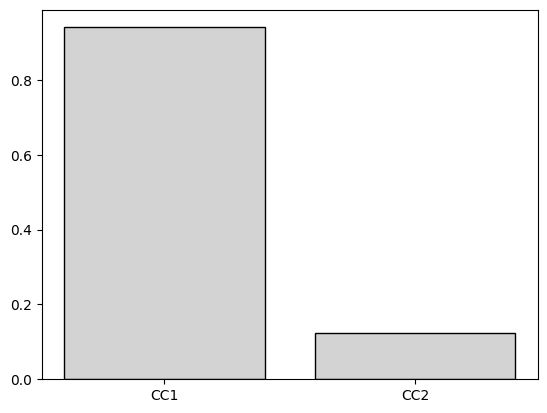

In [6]:
comp_corr = [np.corrcoef(X1_c[:, i], X2_c[:, i])[1][0] for i in range(n_comp)]
plt.bar(['CC1', 'CC2'], comp_corr, color='lightgrey', width = 0.8, edgecolor='k')

We can see that the first canonical variates pair is highly correlated. The second canonical variates pair not so much. We will analyze only the first canonical variates pair as the second one does not contain much information.

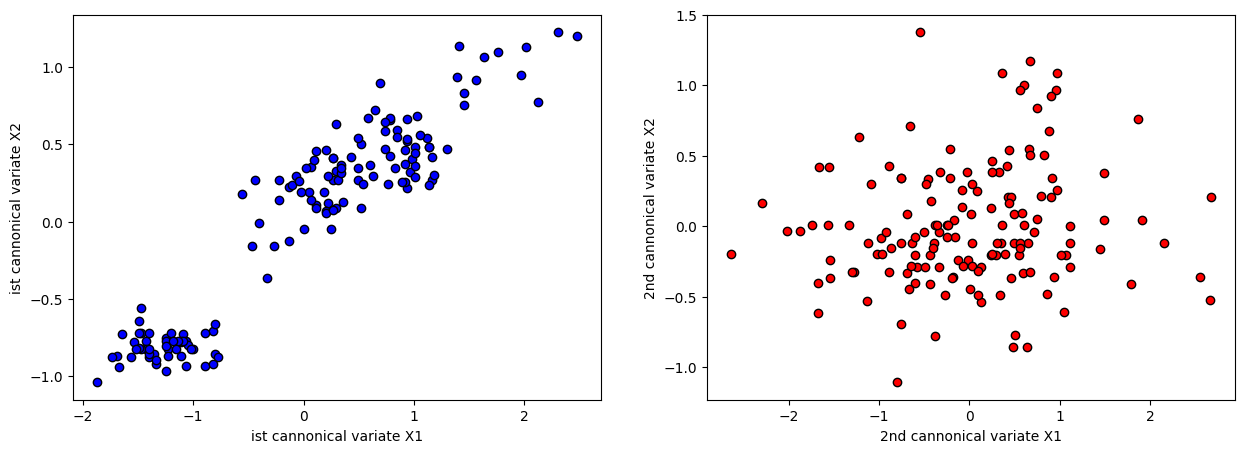

In [8]:
# plotting canonical variates cc1 cc2 side by side
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X1_c[:, 0], X2_c[:, 0], c='b', edgecolor='k')
ax[0].set_xlabel('ist cannonical variate X1')
ax[0].set_ylabel('ist cannonical variate X2')
ax[1].scatter(X1_c[:, 1], X2_c[:, 1], c='r', edgecolor='k')
ax[1].set_xlabel('2nd cannonical variate X1')
ax[1].set_ylabel('2nd cannonical variate X2')
plt.show()



In [11]:
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [X2.columns])
coef_df.index = X1.columns
coef_df

,petal length (cm),petal width (cm)
sepal length (cm),1.60,-0.31
sepal width (cm),1.77,0.28


In [22]:
# Implement any one type of SOM for any application of choice and compare the results with the results obtained from CCA.

# SOM for iris dataset
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import animation, colors
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler


In [23]:
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
def minmax_scaler(data):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(data)
    return scaled


In [25]:
def e_distance(x, y):
    return distance.euclidean(x, y)


In [26]:
def m_distance(x, y):
    return distance.cityblock(x, y)


In [27]:
def winning_neuron(data, t, som, num_rows, num_cols):
    winner = [0, 0]
    shortest_distance = np.sqrt(data.shape[1])
    input_data = data[t]
    for row in range(num_rows):
        for col in range(num_cols):
            distance = e_distance(som[row][col], data[t])
            if distance < shortest_distance:
                shortest_distance = distance
                winner = [row, col]
    return winner


In [37]:
import math
def decay(step, max_steps, max_learning_rate, max_m_dsitance):
    coefficient = 1.0 - (np.float64(step) / max_steps)
    learning_rate = coefficient * max_learning_rate
    neighbourhood_range = math.ceil(coefficient * max_m_dsitance)
    return learning_rate, neighbourhood_range


In [38]:
num_rows = 10
num_cols = 10
max_m_dsitance = 4
max_learning_rate = 0.5
max_steps = int(7.5 * 10e3)

train_x_norm = minmax_scaler(X_train)

num_dims = train_x_norm.shape[1]
np.random.seed(40)
som = np.random.random_sample(size=(num_rows, num_cols, num_dims))


In [39]:
for step in range(max_steps):
    if (step + 1) % 1000 == 0:
        print("Iteration: ", step + 1)
    learning_rate, neighbourhood_range = decay(step, max_steps, max_learning_rate, max_m_dsitance)

    t = np.random.randint(0, high=train_x_norm.shape[0])
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    for row in range(num_rows):
        for col in range(num_cols):
            if m_distance([row, col], winner) <= neighbourhood_range:
                som[row][col] += learning_rate * (train_x_norm[t] - som[row][col])

print("SOM training completed")


Iteration:  1000
Iteration:  2000
Iteration:  3000
Iteration:  4000
Iteration:  5000
Iteration:  6000
Iteration:  7000
Iteration:  8000
Iteration:  9000
Iteration:  10000
Iteration:  11000
Iteration:  12000
Iteration:  13000
Iteration:  14000
Iteration:  15000
Iteration:  16000
Iteration:  17000
Iteration:  18000
Iteration:  19000
Iteration:  20000
Iteration:  21000
Iteration:  22000
Iteration:  23000
Iteration:  24000
Iteration:  25000
Iteration:  26000
Iteration:  27000
Iteration:  28000
Iteration:  29000
Iteration:  30000
Iteration:  31000
Iteration:  32000
Iteration:  33000
Iteration:  34000
Iteration:  35000
Iteration:  36000
Iteration:  37000
Iteration:  38000
Iteration:  39000
Iteration:  40000
Iteration:  41000
Iteration:  42000
Iteration:  43000
Iteration:  44000
Iteration:  45000
Iteration:  46000
Iteration:  47000
Iteration:  48000
Iteration:  49000
Iteration:  50000
Iteration:  51000
Iteration:  52000
Iteration:  53000
Iteration:  54000
Iteration:  55000
Iteration:  56000
I

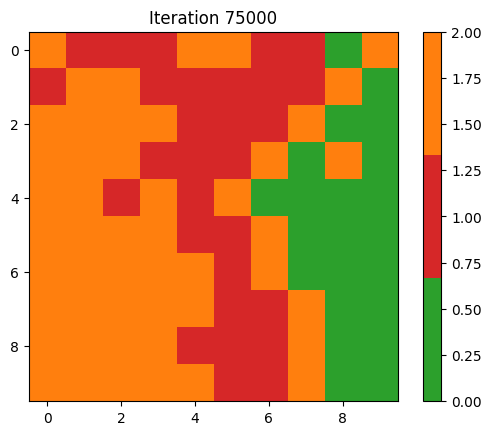

In [40]:
label_data = y_train
map = np.empty(shape=(num_rows, num_cols), dtype=object)

for row in range(num_rows):
    for col in range(num_cols):
        map[row][col] = []

for t in range(train_x_norm.shape[0]):
    if (t + 1) % 1000 == 0:
        print("sample data: ", t + 1)
    winner = winning_neuron(train_x_norm, t, som, num_rows, num_cols)
    map[winner[0]][winner[1]].append(label_data[t])


label_map = np.zeros(shape=(num_rows, num_cols), dtype=np.int64)
for row in range(num_rows):
    for col in range(num_cols):
        label_list = map[row][col]
        if len(label_list) == 0:
            label = 2
        else:
            label = max(label_list, key=label_list.count)
        label_map[row][col] = label

title = ('Iteration ' + str(max_steps))
cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
plt.imshow(label_map, cmap=cmap)
plt.colorbar()
plt.title(title)
plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


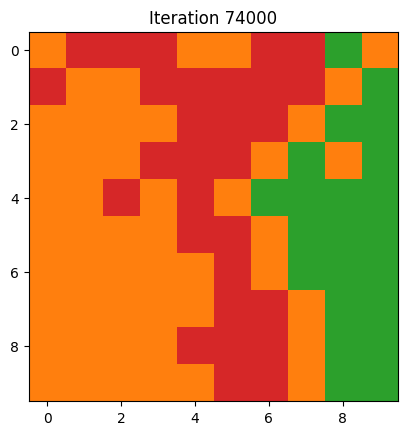

In [41]:
fig = plt.figure()
ims = []
for i in range(0, max_steps, 1000):
    title = ('Iteration ' + str(i))
    cmap = colors.ListedColormap(['tab:green', 'tab:red', 'tab:orange'])
    im = plt.imshow(label_map, cmap=cmap, animated=True)
    plt.title(title)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True, repeat_delay=1000)
ani.save('SOM1.gif', writer='imagemagick')

plt.show()
